In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np 
from sklearn.model_selection import (KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV)

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, accuracy_score, classification_report, f1_score, precision_recall_fscore_support)

train = pd.read_csv('alc-datathon-2021/covid_mental_health_train.csv')
test = pd.read_csv('alc-datathon-2021/covid_mental_health_test.csv')

train.shape
test.shape
train.isnull().sum()





id                           0
city                         0
gender                       0
age                          0
job                          0
health_worker_self           0
health_worker_family         0
family_status                0
income_group              1328
current_physical             0
past_physical                0
current_mental               0
past_mental                  0
exercise                     0
healthy_diet                 0
healthy_sleep                0
activity                     0
interaction_offline          0
interaction_online           0
preventive_behaviors         0
optimism                     0
deterioration_economy        0
deterioration_interact       0
frustration                  0
covid_anxiety                0
covid_sleepless              0
difficulty_living            0
difficulty_work              0
depression                   0
dtype: int64

In [19]:
y = train['depression']

#features er 'deterioration_economy' baad diye 'optimism' dile auc bare

features = ['current_mental', 'past_mental','optimism', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living']



X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
model.fit(X, y)
predictions = model.predict_proba(X_test)[:,1]

print(predictions)

output = pd.DataFrame({'id': test['id'], 'depression': predictions})

print(output)
#output.to_csv('3_RUET_Trinity_RandomForest_4thtryV4.csv', index=False)

[0.21119421 0.11077529 0.0710188  ... 0.13432778 0.17615481 0.23351181]
              id  depression
0      828763412    0.211194
1     2009293273    0.110775
2      360753013    0.071019
3      321912830    0.122636
4     1090960107    0.293491
...          ...         ...
2718  1757603200    0.389297
2719   262849879    0.499414
2720  1521871763    0.134328
2721  2053555030    0.176155
2722  1914354871    0.233512

[2723 rows x 2 columns]


1722
0.74087725974828
0.41592096859447253


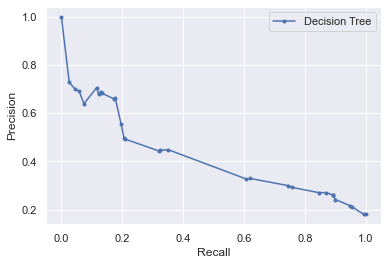

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

dt = DecisionTreeClassifier(max_depth=5, random_state=1)

dt.fit(X_train, y_train)

#y_predict= dt.predict(X_test)

#accuracy_score(y_test, y_predict)

y_predict = dt.predict_proba(X_test)[:,1]

yl = len(y_test)
print(yl)

dt_roc_auc = roc_auc_score(y_test, y_predict)

print(dt_roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
dt_auc = auc(recall, precision)
print(dt_auc)

plt.plot(recall, precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

svm_model = svm.SVC(kernel='linear', C=1, gamma='auto')
svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_test)
accuracy_score(predictions, y_test)

0.8292682926829268

In [22]:
y = train['depression']
#features er 'deterioration_economy' baad diye 'optimism' dile auc bare
features = ['current_mental', 'past_mental', 'optimism', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living']

X = pd.get_dummies(train[features])
#sns.pairplot(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=5)

rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)

rf.fit(X_train, y_train)

#y_predict= rf.predict(X_test)
y_predict = rf.predict_proba(X_test)[:,1]

#accuracy_score(y_test, y_predict)

yl = len(y_test)
print(yl)

rf_roc_auc = roc_auc_score(y_test, y_predict)

print(rf_roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
rf_auc = auc(recall, precision)
print(rf_auc)




1722
0.8127197650066884
0.5337497060482499
